# **Quantum Half-Adder and Full-Adder**

In this section, we shall utilize our existing knowledge of quantum logic gates, and shall build a quantum half-adder and a quantum-full adder. This shall lay the foreground to build more complex circuits of quantum multiplexers and quantum encoders/decoders.

## **Brief introduction to Adders** 
Adders are basic digital circuits that help in addition of two numbers, encoded in the binary format. They form the building block of ALU (Arithmetic Logic Units), which is a key processing component of modern day CPU's.



### *Difference between Half and Full Adder*
A half adder just adds two bits together and gives a two-bit output. A full adder adds two inputs and a carried input from another adder, and also gives a two-bit output.

### **Quantum Half-Adder Circuit Implementation**

In [1]:
!pip install qiskit
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
half_adder = QuantumCircuit(4, 2)
#Encode your input here. The input encode in our case is 11
half_adder.x(0)
half_adder.x(1)

half_adder.barrier()

#Two CNOTs
half_adder.cx(0,2)
half_adder.cx(1,2)
#Toffoli gate
half_adder.ccx(0,1,3) 

#second barrier
half_adder.barrier()

#measures
half_adder.measure(2,0)
half_adder.measure(3,1)

half_adder.draw()


┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

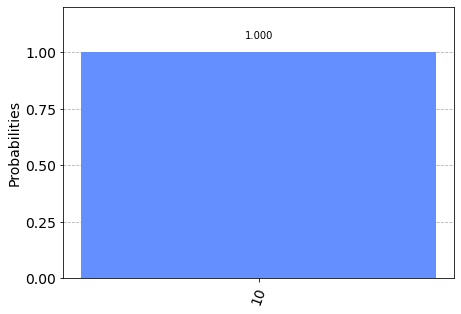

In [3]:
#let's execute
counts_ha = execute(half_adder,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_ha)

### **Full-Adder Quantum Circuit**

Note- A full-adder circuit has three inputs. A, B and Carry. So, we will require three qubit inputs. However, just like half-adder, we still have two bit output. Hence, we define a two output qubits. 



In [4]:
full_adder = QuantumCircuit(7,2)


You might notice that we took 7 qubits. Let's break this down -

1. We take 3 qubits for our input
2. We take 2 qubits for out output
3. Finally, we take 2 qubits for storing the outputs by the Toffoli gates. 


Toffoli gates store their output in a seperate gate, unlike the CNOT gate, which writes over its (CNOT's) value on the *target qubit*.

This above tip comes in handy while designing a bit complex circuits, which require the use of Toffoli gates.

In [5]:
#Encode your input here. The input taken in this case is 0,1,1
full_adder.x(1)
full_adder.x(2)
#full_adder.x(0)
full_adder.barrier()


### **Moving from Half-Adder to Full-Adder**

Full-Adder in it's most basic form is made of two Half-adders and one OR gate. 


This is how the full-adder is made - 

1. The first half-adder takes the first two input bits (A and B), which results in the two output bits, one from the CNOT implementation of the half-adder and one from the Toffoli gate implementation of the half-adder.

2. The second half-adder takes the two inputs - the XOR result of the previous half-adder and the third input bit (Carry), given initially for our full-adder. 

In [6]:

# Notice the first half-adder. The template is similar to our previous example of half-adder.
full_adder.cx(0,3)
full_adder.cx(1,3)
full_adder.ccx(0,1,4)

#The first half-adder ends here. The output bit of first half-adder being qubit 3 and qubit 4.


In [7]:
# Notice the second half-adder. Input bits are qubit 2 (carry) and qubit 3 (XOR result of first half-adder)
full_adder.ccx(3,2,5)
#This operation is done before because we would require the value of qubit 2 again for XOR implementation of our second-half adder
full_adder.cx(2,3)
#You might notice that we don't use two CNOTs for the first operation. This is because, we don't require the value of XOR implementation of first half-adder, hence we overwrite it, by making it the target qubit for out CNOT operation


Our final task is implementing an OR gate. 

**Note that there is no in-build function to execute a logical OR gate in Qiskit.**

*However, by the power of CNOT and Toffoli, we can build a combinational quantum circuit that yield the same truth table as that of OR gate*.

We require to perform an OR operation on qubit 4 and qubit 5. Also, we require to save it's value on differnt qubit 6. 
Here, we use one possible combinations. Many other ways also exist. Try finding one of your own !


In [8]:
full_adder.x(4)
full_adder.x(5)
full_adder.ccx(4,5,6)
full_adder.x(6)

In [9]:
full_adder.barrier()
full_adder.draw()

░                                     ░ 
q_0: ──────░───■─────────■───────────────────────░─
     ┌───┐ ░   │         │                       ░ 
q_1: ┤ X ├─░───┼────■────■───────────────────────░─
     ├───┤ ░   │    │    │                       ░ 
q_2: ┤ X ├─░───┼────┼────┼────■────■─────────────░─
     └───┘ ░ ┌─┴─┐┌─┴─┐  │    │  ┌─┴─┐           ░ 
q_3: ──────░─┤ X ├┤ X ├──┼────■──┤ X ├───────────░─
           ░ └───┘└───┘┌─┴─┐  │  ├───┤           ░ 
q_4: ──────░───────────┤ X ├──┼──┤ X ├──■────────░─
           ░           └───┘┌─┴─┐├───┤  │        ░ 
q_5: ──────░────────────────┤ X ├┤ X ├──■────────░─
           ░                └───┘└───┘┌─┴─┐┌───┐ ░ 
q_6: ──────░──────────────────────────┤ X ├┤ X ├─░─
           ░                          └───┘└───┘ ░ 
c: 2/══════════════════════════════════════════════

In [10]:
full_adder.measure(6,0)
full_adder.measure(3,1)


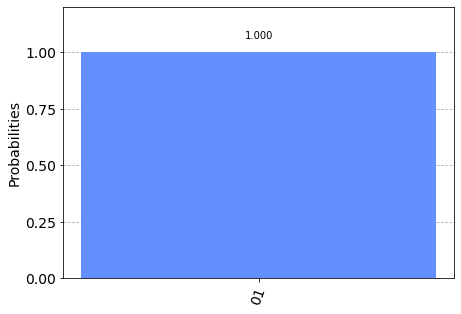

In [11]:
counts = execute(full_adder, Aer.get_backend("qasm_simulator")).result().get_counts()
plot_histogram(counts)


In [12]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright